In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.interpolate import interp1d

In [2]:
with open(r'C:\Users\GajeraRonakkumarIPCa\Desktop\Data set\Matlab severson file\Batch_41,43,40 data\batch_1.pkl', 'rb') as file:
    batch1 = pickle.load(file)
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
b1c0_data = batch1['b1c0']
for key, value in b1c0_data.items():
    print(f"{key} -> Type: {type(value)}")
    if isinstance(value, list) or isinstance(value, dict):
        print(f"Length of {key}: {len(value)}")

cycle_life -> Type: <class 'numpy.ndarray'>
charge_policy -> Type: <class 'str'>
summary -> Type: <class 'dict'>
Length of summary: 8
cycles -> Type: <class 'dict'>
Length of cycles: 1189


In [5]:
cycle_lives = {key: battery_data['cycle_life'] for key, battery_data in batch1.items()}

cycle_lives

{'b1c0': array([[1190.]]),
 'b1c1': array([[1179.]]),
 'b1c2': array([[1177.]]),
 'b1c3': array([[1226.]]),
 'b1c4': array([[1227.]]),
 'b1c5': array([[1074.]]),
 'b1c6': array([[636.]]),
 'b1c7': array([[870.]]),
 'b1c9': array([[1054.]]),
 'b1c11': array([[788.]]),
 'b1c14': array([[880.]]),
 'b1c15': array([[719.]]),
 'b1c16': array([[862.]]),
 'b1c17': array([[857.]]),
 'b1c18': array([[691.]]),
 'b1c19': array([[788.]]),
 'b1c20': array([[534.]]),
 'b1c21': array([[559.]]),
 'b1c23': array([[1014.]]),
 'b1c24': array([[1017.]]),
 'b1c25': array([[854.]]),
 'b1c26': array([[870.]]),
 'b1c27': array([[842.]]),
 'b1c28': array([[860.]]),
 'b1c29': array([[917.]]),
 'b1c30': array([[709.]]),
 'b1c31': array([[876.]]),
 'b1c32': array([[731.]]),
 'b1c33': array([[757.]]),
 'b1c34': array([[742.]]),
 'b1c35': array([[703.]]),
 'b1c36': array([[704.]]),
 'b1c37': array([[648.]]),
 'b1c38': array([[617.]]),
 'b1c39': array([[625.]]),
 'b1c40': array([[966.]]),
 'b1c41': array([[1051.]]),


In [8]:
numBat1 = len(batch1.keys())
numBat1

41

In [9]:
batch2 = pickle.load(open(r'C:\Users\GajeraRonakkumarIPCa\Desktop\Data set\Matlab severson file\Batch_41,43,40 data\batch_2.pkl', 'rb'))
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [10]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [11]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [12]:
numBat2 = len(batch2.keys())
print('Battery numbers of Batch2:',numBat2) #43

Battery numbers of Batch2: 43


In [13]:
batch3 = pickle.load(open(r'C:\Users\GajeraRonakkumarIPCa\Desktop\Data set\Matlab severson file\Batch_41,43,40 data\batch_3.pkl', 'rb'))
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [14]:
numBat3 = len(batch3.keys())
print('Battery numbers of Batch3:',numBat3) #40


Battery numbers of Batch3: 40


In [15]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [16]:
all_batch = {}
all_batch.update(batch1)
all_batch.update(batch2)
all_batch.update(batch3)

In [17]:
def discharge_curve(batches, batch_idx, cycle, clean=True):
    qds = np.array(batches[batch_idx]['cycles'][cycle]['Qd'])
    vs = np.array(batches[batch_idx]['cycles'][cycle]['V'])
    if not clean:
        return vs, qds

    # filter out samples that don't make sense by finding the first
    # maximum and subsequent minimum and only consider that range
    start = np.argmax(vs)
    end = np.argmin(vs[start:]) + start
    vs = vs[start:end]
    qds = qds[start:end]
    return vs, qds

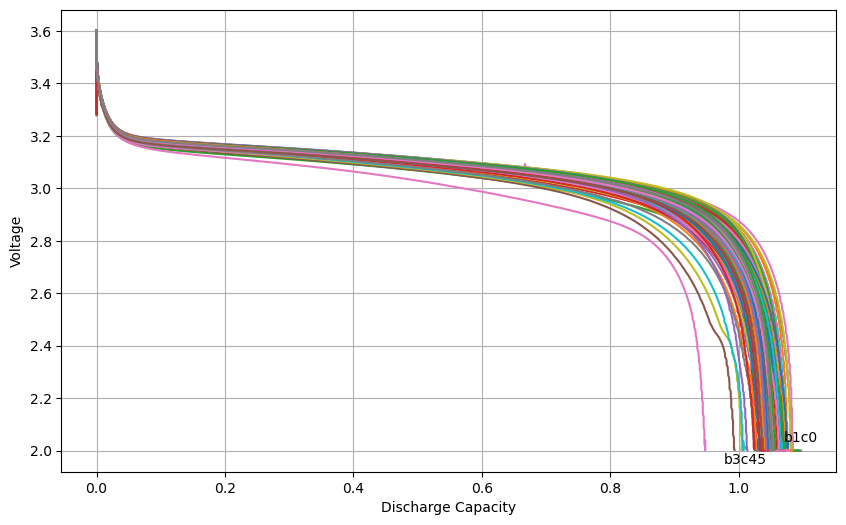

In [18]:
batches = list(all_batch.keys())
first_batch = batches[0]
last_batch = batches[-1]

# Initialize lists to store discharge curves
all_vs1c = []
all_qds1c = []
all_vs2c = []
all_qds2c = []

# Loop through each batch and compute discharge curves
for batch in batches:
    vs1c, qds1c = discharge_curve(all_batch, batch, '10')
    vs2c, qds2c = discharge_curve(all_batch, batch, '100')
    
    all_vs1c.append(vs1c)
    all_qds1c.append(qds1c)
    all_vs2c.append(vs2c)
    all_qds2c.append(qds2c)

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.xlabel('Discharge Capacity')
plt.ylabel('Voltage')

# Plot all discharge curves on the same graph
for batch, vs1c, qds1c in zip(batches, all_vs1c, all_qds1c):
    plt.plot(qds1c, vs1c, label=batch)
for batch, vs2c, qds2c in zip(batches, all_vs2c, all_qds2c):
    plt.plot(qds2c, vs2c, label=batch)

# Add labels for first and last batches
plt.annotate(f'{first_batch}', xy=(all_qds1c[0][-1], all_vs1c[0][-1]), textcoords='offset points', xytext=(5,5), ha='left')
plt.annotate(f'{last_batch}', xy=(all_qds1c[-1][-1], all_vs1c[-1][-1]), textcoords='offset points', xytext=(-5,-10), ha='right')
plt.grid(True)
plt.show()

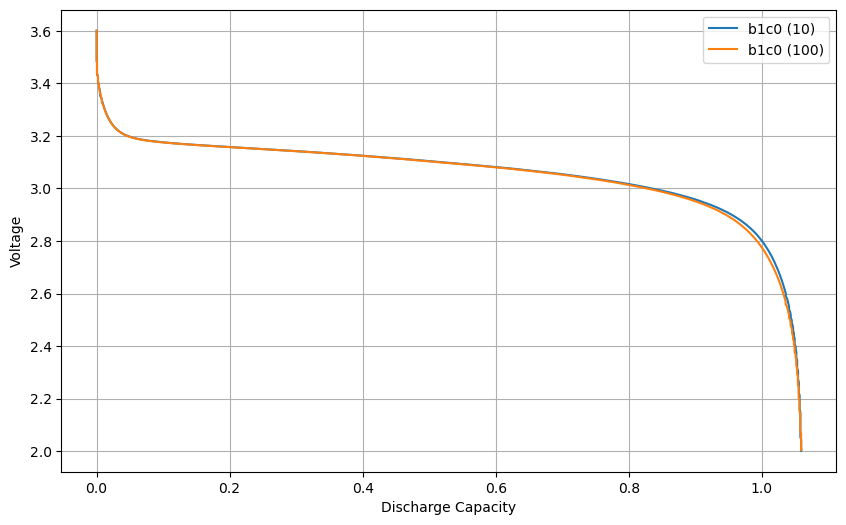

In [19]:
# Compute discharge curves for the last batch
vs1c_last_10, qds1c_last_10 = discharge_curve(all_batch, first_batch, '10')
vs2c_last_10, qds2c_last_10 = discharge_curve(all_batch, first_batch, '100')

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.xlabel('Discharge Capacity')
plt.ylabel('Voltage')

# Plot the last batch's discharge curves for 10A and 100A
plt.plot(qds1c_last_10, vs1c_last_10, label=first_batch + ' (10)')
plt.plot(qds2c_last_10, vs2c_last_10, label=first_batch + ' (100)')
plt.grid(True)
plt.legend()
plt.show()

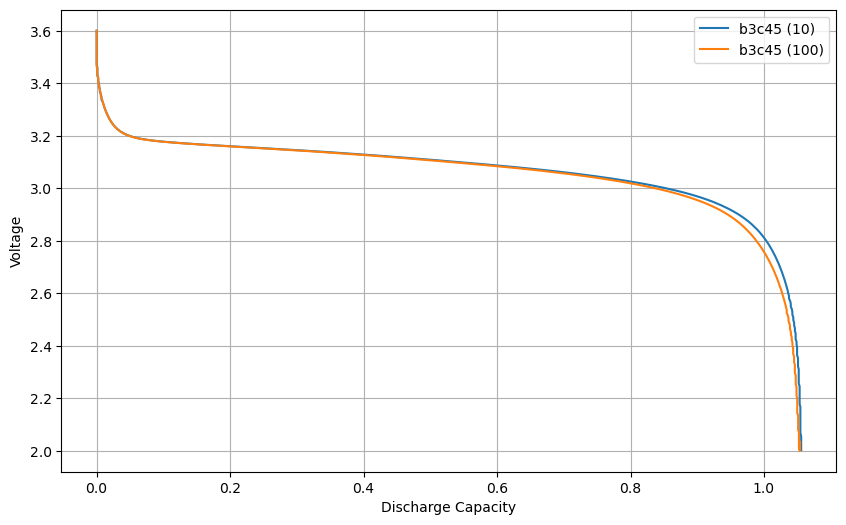

In [20]:
# Compute discharge curves for the last batch
vs1c_last_10, qds1c_last_10 = discharge_curve(all_batch, last_batch, '10')
vs2c_last_10, qds2c_last_10 = discharge_curve(all_batch, last_batch, '100')

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.xlabel('Discharge Capacity')
plt.ylabel('Voltage')

# Plot the last batch's discharge curves for 10A and 100A
plt.plot(qds1c_last_10, vs1c_last_10, label=last_batch + ' (10)')
plt.plot(qds2c_last_10, vs2c_last_10, label=last_batch + ' (100)')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# use scipy.interplate.interp1d to re-sample the above curve in terms of V and THEN calculate the difference!

# get the discharge curve as a scipy object including min and max X values
def get_Qs(batches, batch_idx, cycle):
    vs, qds = discharge_curve(batches, batch_idx, cycle) 
    newF = interp1d(vs, qds)
    return newF, min(vs), max(vs)

#nsamples = number of samples for the discharge curve
def get_Qdiffs(batches, nsamples=1000):
    # the curves for cycle 10 and 100
    Q10s = np.array([get_Qs(batches, b, '10') for b in batches])
    Q100s = np.array([get_Qs(batches, b, '100') for b in batches])

    # calculate Q_100(V) - Q_10(V) for each run
    Qdiffs = []
    xvalues = []
    for q100, q10 in zip(Q100s, Q10s):
        # find the overlapping range
        start = max(q10[1], q100[1])
        end   = min(q10[2], q100[2])
        x = np.linspace(start, end, nsamples)
        # resample the curves and calculate Q100 - Q10
        curve10 = q10[0]
        curve100 = q100[0]
        Qdiffs.append(curve100(x) - curve10(x))
        xvalues.append(x)

    Qdiffs = np.array(Qdiffs)
    xvalues = np.array(xvalues)
    # print(Qdiffs.shape, xvalues.shape)
    return xvalues, Qdiffs

# Variance features

In [22]:
# use scipy.interplate.interp1d to re-sample the above curve in terms of V and THEN calculate the difference!

# get the discharge curve as a scipy object including min and max X values
def get_Qs(batches, batch_idx, cycle):
    vs, qds = discharge_curve(batches, batch_idx, cycle) 
    newF = interp1d(vs, qds)
    return newF, min(vs), max(vs)

#nsamples = number of samples for the discharge curve
def get_Qdiffs(batches, nsamples=1000):
    # the curves for cycle 10 and 100
    Q10s = np.array([get_Qs(batches, b, '10') for b in batches])
    Q100s = np.array([get_Qs(batches, b, '100') for b in batches])

    # calculate Q_100(V) - Q_10(V) for each run
    Qdiffs = []
    xvalues = []
    for q100, q10 in zip(Q100s, Q10s):
        # find the overlapping range
        start = max(q10[1], q100[1])
        end   = min(q10[2], q100[2])
        x = np.linspace(start, end, nsamples)
        # resample the curves and calculate Q100 - Q10
        curve10 = q10[0]
        curve100 = q100[0]
        Qdiffs.append(curve100(x) - curve10(x))
        xvalues.append(x)

    Qdiffs = np.array(Qdiffs)
    xvalues = np.array(xvalues)
    # print(Qdiffs.shape, xvalues.shape)
    return xvalues, Qdiffs
def get_cycle_lifes(batches):
    return np.array([batches[b]['cycle_life'] for b in batches]).flatten()

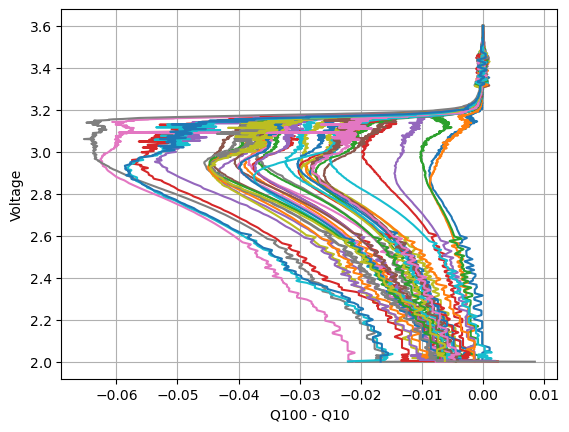

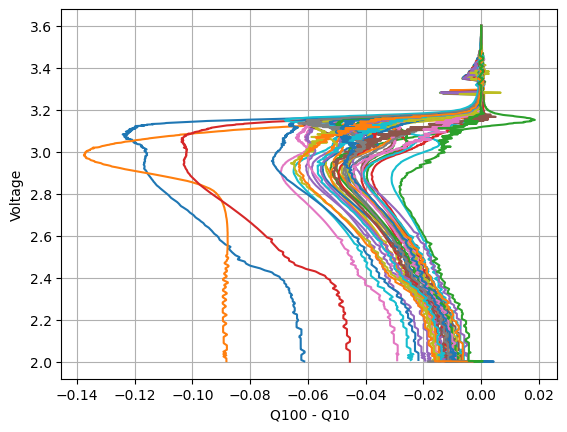

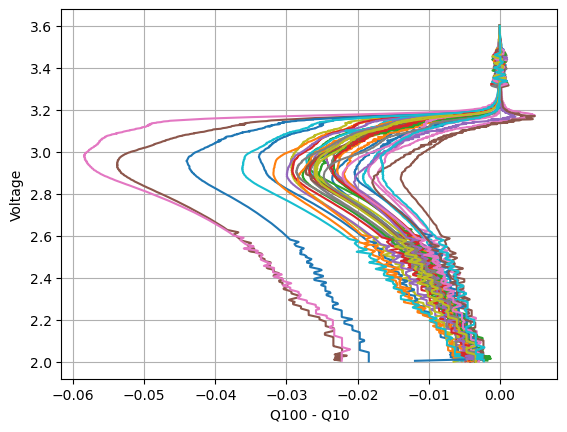

In [23]:
for batch in [batch1,batch2,batch3]:
    plt.xlabel('Q100 - Q10')
    plt.ylabel('Voltage')
    xvalues, Qdiffs = get_Qdiffs(batch)
    for y, x in zip(xvalues, Qdiffs):
        plt.plot(x, y)
    plt.grid(True)
    plt.show()


C:\Users\GajeraRonakkumarIPCa\AppData\Local\Temp\ipykernel_29092\375283996.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


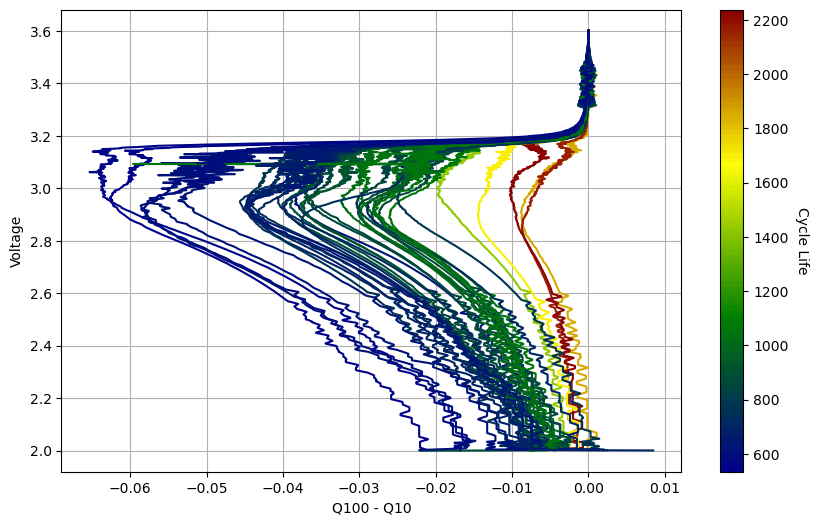

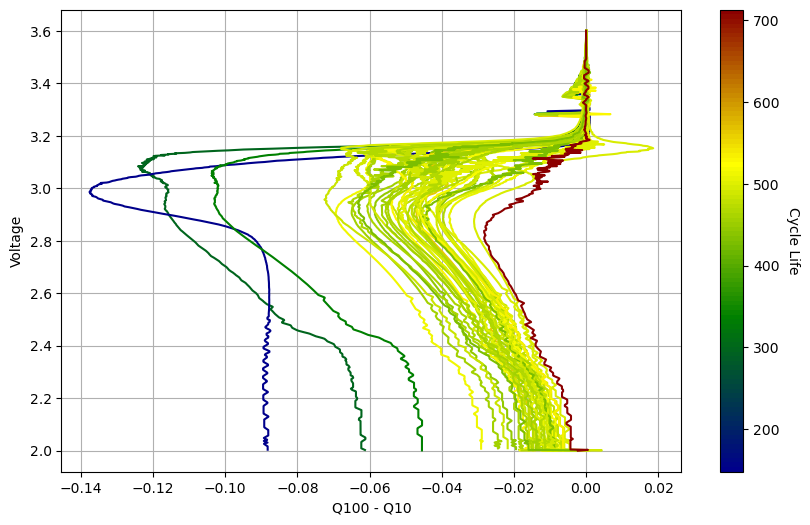

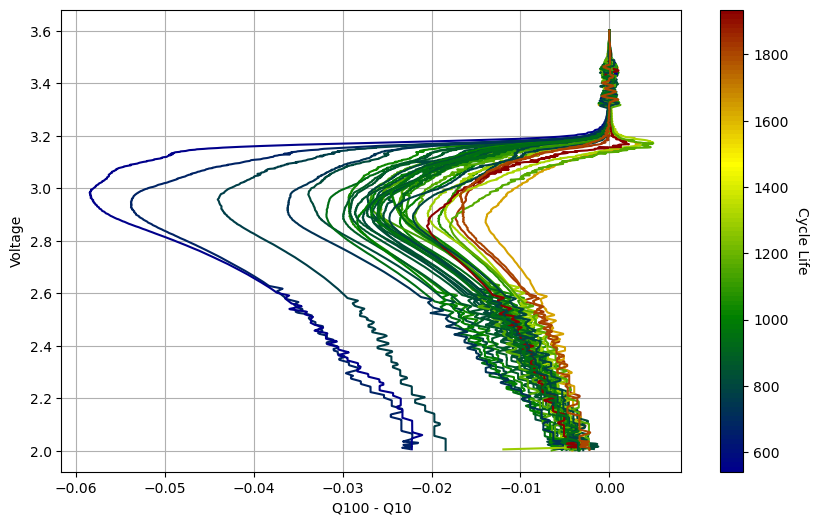

In [24]:
import matplotlib.colors as mcolors
# Define your colormap
colors = ["darkblue", "green", "yellow", "darkred"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors, N=100)

# Plot each batch with color-coding based on cycle life
for batch in [batch1, batch2, batch3]:  # Replace these with your actual batches
    # Extract xvalues, Qdiffs, and cycle_lifes for the batch
    xvalues, Qdiffs = get_Qdiffs(batch)
    cycle_lifes = get_cycle_lifes(batch)

    # Normalize cycle life for color mapping
    norm = plt.Normalize(min(cycle_lifes), max(cycle_lifes))

    # Create a new plot for each batch
    plt.figure(figsize=(10, 6))
    plt.xlabel('Q100 - Q10')
    plt.ylabel('Voltage')

    # Plot each curve with color-coding based on cycle life
    for x, y, cycle_life in zip(Qdiffs, xvalues, cycle_lifes):
        plt.plot(x, y, color=cmap(norm(cycle_life)))

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Cycle Life', rotation=270, labelpad=15)

    plt.grid(True)
    plt.show()

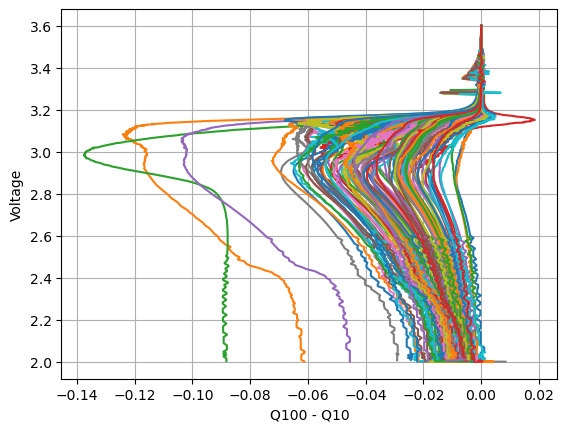

In [25]:
for batch in [all_batch]:
    plt.xlabel('Q100 - Q10')
    plt.ylabel('Voltage')
    xvalues, Qdiffs = get_Qdiffs(batch)
    for y, x in zip(xvalues, Qdiffs):
        plt.plot(x, y)
    plt.grid(True)
    plt.show()

C:\Users\GajeraRonakkumarIPCa\AppData\Local\Temp\ipykernel_29092\514450719.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


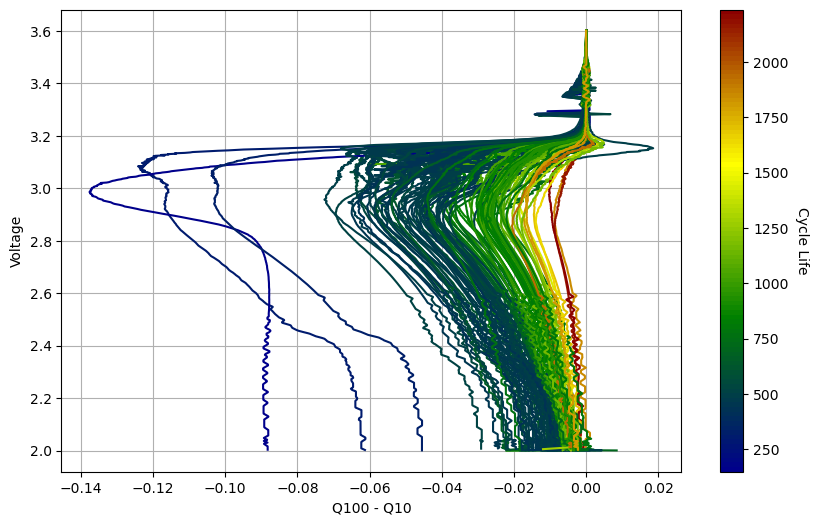

In [26]:
# Define your colormap
colors = ["darkblue", "green", "yellow", "darkred"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors, N=100)

# Plot each batch with color-coding based on cycle life
for batch in [all_batch]:  # Replace these with your actual batches
    # Extract xvalues, Qdiffs, and cycle_lifes for the batch
    xvalues, Qdiffs = get_Qdiffs(batch)
    cycle_lifes = get_cycle_lifes(batch)

    # Normalize cycle life for color mapping
    norm = plt.Normalize(min(cycle_lifes), max(cycle_lifes))

    # Create a new plot for each batch
    plt.figure(figsize=(10, 6))
    plt.xlabel('Q100 - Q10')
    plt.ylabel('Voltage')

    # Plot each curve with color-coding based on cycle life
    for x, y, cycle_life in zip(Qdiffs, xvalues, cycle_lifes):
        plt.plot(x, y, color=cmap(norm(cycle_life)))

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Cycle Life', rotation=270, labelpad=15)

    plt.grid(True)
    plt.show()

In [27]:

features = {
    'Variance': get_variances,
}


NameError: name 'get_variances' is not defined

In [ ]:
for feat, feat_func in features.items():
    for batch in [batch1,batch2,batch3]:
        xvalues, Qdiffs = get_Qdiffs(batch)
        fvalues = feat_func(Qdiffs)
        lifes = get_cycle_lifes(batch)
        plt.scatter(fvalues, lifes)

    plt.xlabel(f'{feat}(Q100 - Q10)')
    plt.ylabel('Cycle Life')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

In [ ]:
for feat, feat_func in features.items():
    for batch in [all_batch]:  # allbatch_cleaned is iterable
        xvalues, Qdiffs = get_Qdiffs(batch)
        fvalues = feat_func(Qdiffs)
        lifes = get_cycle_lifes(batch)
        
        # Normalize cycle life for color mapping
        norm = plt.Normalize(min(lifes), max(lifes))
        
        # Calculate Pearson correlation coefficient between log-transformed data
        correlation_coefficient, p_value = pearsonr(np.log(fvalues), np.log(lifes))
        
        # Print the correlation coefficient
        print(f"Correlation coefficient between {feat}(Q100 - Q10) and Cycle Life for batch: {correlation_coefficient}")

        # Visualize the scatter plot with color-coding based on cycle life
        scatter = plt.scatter(fvalues, lifes, c=lifes, cmap=cmap, norm=norm)
        
        # Set the scale of x and y axes to log
        plt.xscale('log')
        plt.yscale('log')
        
        # Add colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Cycle Life', rotation=270, labelpad=15)
        
        plt.xlabel(f'Log of {feat}(Q100 - Q10)')
        plt.ylabel('Log of Cycle Life')
        plt.title(f'Correlation coefficient: {correlation_coefficient:.2f}')
        plt.grid(True)
        plt.show()

In [ ]:
from scipy.stats import pearsonr
for feat, feat_func in features.items():
    for batch in [batch1,batch2,batch3]:
        xvalues, Qdiffs = get_Qdiffs(batch)
        fvalues = feat_func(Qdiffs)
        lifes = get_cycle_lifes(batch)
        
        # Log-transform the data to compute correlation on log-log scale
        log_fvalues = np.log(fvalues)
        log_lifes = np.log(lifes)
        
        # Calculate Pearson correlation coefficient between log-transformed data
        correlation_coefficient, p_value = pearsonr(log_fvalues, log_lifes)
        
        # Print the correlation coefficient
        print(f"Correlation coefficient between {feat}(Q100 - Q10) and Cycle Life for batch: {correlation_coefficient}")

        # visualize the scatter plot with the correlation coefficient
        plt.scatter(log_fvalues, log_lifes)
        plt.xlabel(f'Log of {feat}(Q100 - Q10)')
        plt.ylabel('Log of Cycle Life')
        plt.title(f'Correlation coefficient: {correlation_coefficient:.2f}')
        plt.grid(True)
        plt.show()

In [ ]:
print(all_batch['b1c0'])